# Karamoja Food Security Monitoring Tool Data Analysis Report.
#### Analyst: Veronica Mwihaki
#### Date : 16th February 2026


## Introduction
Karamoja is one of the most food insecure region in Uganda facing several challenges such low productivity level of crops, intense droughts as well as pests and diseases. This leads to a significant reduce in productivity of crops. NGO's in this region don't have confirmed numbers or tools in order to know the state of food security in the region. This makes it difficult to prioritize areas that need intervention immediately.

## Objective
The goal of this analysis is to create a food monitoring tool that visualizes sorghum and maize yield data across the Karamoja districts and sub counties. This will help NGO decision making by identifying areas that are at a higher risk of having food shortages in order to intervene. 

#### Importing analysis

In [121]:
# Data manupulation
import pandas as pd
import numpy as np

In [122]:
#Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import seaborn as sns

#### Loading Data 

We load both datasets and inspect them to understand their structure, check for missing values and prepare them for analysis.

In [123]:
district_df = pd.read_csv(r'C:\Users\ABC\desktop\Karamoja_Food_Security_Monitoring\data\TABLES\Uganda_Karamoja_District_Crop_Yield_Population.csv')
subcounty_df = pd.read_csv(r'C:\Users\ABC\desktop\Karamoja_Food_Security_Monitoring\\data\TABLES\Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

In [124]:
#ensuring theres data in the code
district_df.head()
subcounty_df.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [125]:
#checking the amount of rows and columns
print(district_df.shape)
print(subcounty_df.shape)

(7, 11)
(52, 13)


In [126]:
print(district_df.columns.tolist())
print(subcounty_df.columns.tolist())

['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot']
['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area', 'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot']


#### Data Cleaning 
Before analyzing the Data, we need to handle missing values and data and make sure the columns and rows are consistent.

###### Checking for missing values 

In [127]:
print(district_df.isnull().sum())
print(subcounty_df.isnull().sum())

OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64
OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64


###### Fills missing values with 0

In [128]:
district_df = district_df.fillna(0)
subcounty_df = subcounty_df.fillna(0)

###### Renames Columns for better clarity

In [129]:
district_df = district_df.rename(columns ={'S_Yield_Ha': 'Sorghum_Yield_KgHa','M_Yield_Ha': 'Maize_Yield_KgHa', 'S_Prod_Tot': 'Sorghum_Total_Production_Kg', 'M_Prod_Tot': 'Maize_Total_Production_Kg', 'Crop_Area_Ha': 'Total_Crop_Area_Ha'})

In [130]:
subcounty_df = subcounty_df.rename(columns={
    'S_Yield_Ha': 'Sorghum_Yield_KgHa',
    'M_Yield_Ha': 'Maize_Yield_KgHa',
    'S_Prod_Tot': 'Sorghum_Total_Production_Kg',
    'M_Prod_Tot': 'Maize_Total_Production_Kg',
    'Crop_Area_Ha': 'Total_Crop_Area_Ha'
})

###### Confirm changes


In [131]:
print("\nData cleaned successfully!")
print("\nUpdated District Columns:")
print(district_df.columns.tolist())

print("\nUpdated Subcounty Columns:")
print(subcounty_df.columns.tolist())


Data cleaned successfully!

Updated District Columns:
['OBJECTID', 'NAME', 'POP', 'Area', 'Sorghum_Yield_KgHa', 'Maize_Yield_KgHa', 'Total_Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'Sorghum_Total_Production_Kg', 'Maize_Total_Production_Kg']

Updated Subcounty Columns:
['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area', 'Karamoja', 'Sorghum_Yield_KgHa', 'Maize_Yield_KgHa', 'Total_Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'Sorghum_Total_Production_Kg', 'Maize_Total_Production_Kg']


In [132]:
subcounty_df['Maize_Yield_KgHa'] = pd.to_numeric(subcounty_df['Maize_Yield_KgHa'], errors='coerce')
subcounty_df = subcounty_df.dropna(subset=['Maize_Yield_KgHa', 'DISTRICT_NAME'])

In [133]:
subcounty_df['Sorghum_Total_Production_Kg'] = pd.to_numeric(subcounty_df['Sorghum_Total_Production_Kg'], errors='coerce')
subcounty_df['S_Area_Ha'] = pd.to_numeric(subcounty_df['S_Area_Ha'], errors='coerce')
subcounty_df = subcounty_df.dropna(subset=['Sorghum_Total_Production_Kg', 'S_Area_Ha'])

In [134]:
#summary statistics for districts
print("=== District Summary Statistics ===")
print(district_df.describe())

=== District Summary Statistics ===
        OBJECTID            POP          Area  Sorghum_Yield_KgHa  \
count   7.000000       7.000000  7.000000e+00            7.000000   
mean   61.714286  214943.571429  3.960853e+09          269.285714   
std    36.481567  188604.280916  1.781860e+09          119.243049   
min     5.000000   90385.000000  1.643583e+09          128.000000   
25%    37.000000  114800.500000  3.171069e+09          171.000000   
50%    80.000000  146780.000000  3.641540e+09          279.000000   
75%    88.500000  205391.000000  4.362553e+09          343.500000   
max    96.000000  627057.000000  7.373606e+09          449.000000   

       Maize_Yield_KgHa  Total_Crop_Area_Ha     S_Area_Ha    M_Area_Ha  \
count          7.000000            7.000000      7.000000     7.000000   
mean         986.142857        21094.520379  16737.636651  3983.947082   
std          321.566700        17363.854165  16625.963460  2678.911441   
min          355.000000         5470.068394   

In [135]:
# Summary statistics for subcounties
print("=== Subcounty-Level Summary Statistics ===")
print(subcounty_df.describe())

=== Subcounty-Level Summary Statistics ===
          OBJECTID            POP          Area  Sorghum_Yield_KgHa  \
count    52.000000      52.000000  5.200000e+01           52.000000   
mean    787.865385   28934.692308  5.331913e+08          274.165405   
std     280.101314   20865.122974  4.913308e+08          118.569907   
min     263.000000    1418.000000  2.121209e+06          108.156411   
25%     597.750000   16558.500000  1.568923e+08          173.034066   
50%     810.500000   23053.500000  3.848356e+08          277.255206   
75%     982.250000   39461.000000  7.749029e+08          368.246437   
max    1320.000000  100919.000000  2.069555e+09          560.313070   

       Maize_Yield_KgHa  Total_Crop_Area_Ha     S_Area_Ha    M_Area_Ha  \
count         52.000000           52.000000     52.000000    52.000000   
mean         940.259552         2839.646974   2253.143395   536.300569   
std          321.641901         3110.505917   2954.355858   724.092288   
min            0.0000

## Analysis of District-Level Crop Data
This section explores crop yields, production, and efficiency across districts.

### Average Yield Per Crop

In [136]:
 # Calculate average yield for Sorghum and Maize
avg_yields = district_df[['Sorghum_Yield_KgHa', 'Maize_Yield_KgHa']].mean()

print("=== Average Crop Yields Across Districts (Kg/Ha) ===")
print(avg_yields)

=== Average Crop Yields Across Districts (Kg/Ha) ===
Sorghum_Yield_KgHa    269.285714
Maize_Yield_KgHa      986.142857
dtype: float64


The table above shows the average yield per hectare for Sorghum and Maize across all districts.  
This helps identify which crop performs better on average.

### Top and Bottom Districts by Yield 

In [137]:

# --- Top/Bottom districts by Sorghum Yield ---
top_sorghum = district_df[['NAME','Sorghum_Yield_KgHa']].sort_values(by='Sorghum_Yield_KgHa', ascending=False).head(3)
bottom_sorghum = district_df[['NAME','Sorghum_Yield_KgHa']].sort_values(by='Sorghum_Yield_KgHa').head(3)
print("\n=== Top 3 Districts by Sorghum Yield ===")
print(top_sorghum)
print("\n=== Bottom 3 Districts by Sorghum Yield ===")
print(bottom_sorghum)



=== Top 3 Districts by Sorghum Yield ===
            NAME  Sorghum_Yield_KgHa
0           ABIM                 449
5  NAKAPIRIPIRIT                 356
3         KOTIDO                 331

=== Bottom 3 Districts by Sorghum Yield ===
     NAME  Sorghum_Yield_KgHa
4  MOROTO                 128
6   NAPAK                 137
1  AMUDAT                 205


In [138]:
# --- Top/Bottom districts by Maize Yield ---
top_maize = district_df[['NAME','Maize_Yield_KgHa']].sort_values(by='Maize_Yield_KgHa', ascending=False).head(3)
bottom_maize = district_df[['NAME','Maize_Yield_KgHa']].sort_values(by='Maize_Yield_KgHa').head(3)
print("\n=== Top 3 Districts by Maize Yield ===")
print(top_maize)
print("\n=== Bottom 3 Districts by Maize Yield ===")
print(bottom_maize)


=== Top 3 Districts by Maize Yield ===
            NAME  Maize_Yield_KgHa
1         AMUDAT              1297
5  NAKAPIRIPIRIT              1264
3         KOTIDO              1148

=== Bottom 3 Districts by Maize Yield ===
      NAME  Maize_Yield_KgHa
4   MOROTO               355
6    NAPAK               854
2  KAABONG               945


In [139]:
# --- Top/Bottom districts by Sorghum Production ---
top_prod_sorghum = district_df[['NAME','Sorghum_Total_Production_Kg']].sort_values(by='Sorghum_Total_Production_Kg', ascending=False).head(2)
bottom_prod_sorghum = district_df[['NAME','Sorghum_Total_Production_Kg']].sort_values(by='Sorghum_Total_Production_Kg').head(2)
print("\n=== Top 2 Districts by Sorghum Production ===")
print(top_prod_sorghum)
print("\n=== Bottom 2 Districts by Sorghum Production ===")
print(bottom_prod_sorghum)


=== Top 2 Districts by Sorghum Production ===
            NAME  Sorghum_Total_Production_Kg
3         KOTIDO                     16631904
5  NAKAPIRIPIRIT                      6848491

=== Bottom 2 Districts by Sorghum Production ===
     NAME  Sorghum_Total_Production_Kg
4  MOROTO                       606944
1  AMUDAT                       609552


In [140]:
# --- Top/Bottom districts by Maize Production ---
top_prod_maize = district_df[['NAME','Maize_Total_Production_Kg']].sort_values(by='Maize_Total_Production_Kg', ascending=False).head(2)
bottom_prod_maize = district_df[['NAME','Maize_Total_Production_Kg']].sort_values(by='Maize_Total_Production_Kg').head(2)
print("\n=== Top 2 Districts by Maize Production ===")
print(top_prod_maize)
print("\n=== Bottom 2 Districts by Maize Production ===")
print(bottom_prod_maize)


=== Top 2 Districts by Maize Production ===
            NAME  Maize_Total_Production_Kg
5  NAKAPIRIPIRIT                    8122197
2        KAABONG                    6987723

=== Bottom 2 Districts by Maize Production ===
     NAME  Maize_Total_Production_Kg
4  MOROTO                     422468
0    ABIM                    1922567


### Outliers 
Some of the values are unuasually high or low compared to the rest of the data
e.g 
1. Yield outliers - very high or low Sorghum yields per hectare
2. Production outliers - high production from a small crop area or low production from a large crop area 

In scatter plots, outliers stand out as points far from he main cluster hence they make visualizations informartive. 


In [141]:
# --- Sorghum Yield Outliers ---
top_sorghum_yield = district_df[['NAME','Sorghum_Yield_KgHa']].sort_values(by='Sorghum_Yield_KgHa', ascending=False).head(2)
bottom_sorghum_yield = district_df[['NAME','Sorghum_Yield_KgHa']].sort_values(by='Sorghum_Yield_KgHa').head(2)

print("=== Top 2 Sorghum Yield Districts ===")
print(top_sorghum_yield)
print("\n=== Bottom 2 Sorghum Yield Districts ===")
print(bottom_sorghum_yield)

=== Top 2 Sorghum Yield Districts ===
            NAME  Sorghum_Yield_KgHa
0           ABIM                 449
5  NAKAPIRIPIRIT                 356

=== Bottom 2 Sorghum Yield Districts ===
     NAME  Sorghum_Yield_KgHa
4  MOROTO                 128
6   NAPAK                 137


In [142]:
# --- Maize Yield Outliers ---
top_maize_yield = district_df[['NAME','Maize_Yield_KgHa']].sort_values(by='Maize_Yield_KgHa', ascending=False).head(2)
bottom_maize_yield = district_df[['NAME','Maize_Yield_KgHa']].sort_values(by='Maize_Yield_KgHa').head(2)

print("\n=== Top 2 Maize Yield Districts ===")
print(top_maize_yield)
print("\n=== Bottom 2 Maize Yield Districts ===")
print(bottom_maize_yield)


=== Top 2 Maize Yield Districts ===
            NAME  Maize_Yield_KgHa
1         AMUDAT              1297
5  NAKAPIRIPIRIT              1264

=== Bottom 2 Maize Yield Districts ===
     NAME  Maize_Yield_KgHa
4  MOROTO               355
6   NAPAK               854


In [143]:
# --- Sorghum Production Outliers ---
top_sorghum_prod = district_df[['NAME','Sorghum_Total_Production_Kg']].sort_values(by='Sorghum_Total_Production_Kg', ascending=False).head(2)
bottom_sorghum_prod = district_df[['NAME','Sorghum_Total_Production_Kg']].sort_values(by='Sorghum_Total_Production_Kg').head(2)

print("=== Top 2 Sorghum Production Districts ===")
print(top_sorghum_prod)
print("\n=== Bottom 2 Sorghum Production Districts ===")
print(bottom_sorghum_prod)

=== Top 2 Sorghum Production Districts ===
            NAME  Sorghum_Total_Production_Kg
3         KOTIDO                     16631904
5  NAKAPIRIPIRIT                      6848491

=== Bottom 2 Sorghum Production Districts ===
     NAME  Sorghum_Total_Production_Kg
4  MOROTO                       606944
1  AMUDAT                       609552


In [144]:
# --- Maize Production Outliers ---
top_maize_prod = district_df[['NAME','Maize_Total_Production_Kg']].sort_values(by='Maize_Total_Production_Kg', ascending=False).head(2)
bottom_maize_prod = district_df[['NAME','Maize_Total_Production_Kg']].sort_values(by='Maize_Total_Production_Kg').head(2)

print("\n=== Top 2 Maize Production Districts ===")
print(top_maize_prod)
print("\n=== Bottom 2 Maize Production Districts ===")
print(bottom_maize_prod)


=== Top 2 Maize Production Districts ===
            NAME  Maize_Total_Production_Kg
5  NAKAPIRIPIRIT                    8122197
2        KAABONG                    6987723

=== Bottom 2 Maize Production Districts ===
     NAME  Maize_Total_Production_Kg
4  MOROTO                     422468
0    ABIM                    1922567


## Findings 
In this step , we create charts to visualize crop yields, production and effieciency across all districts. 

#### Bar Chart Sorghum Yield by District

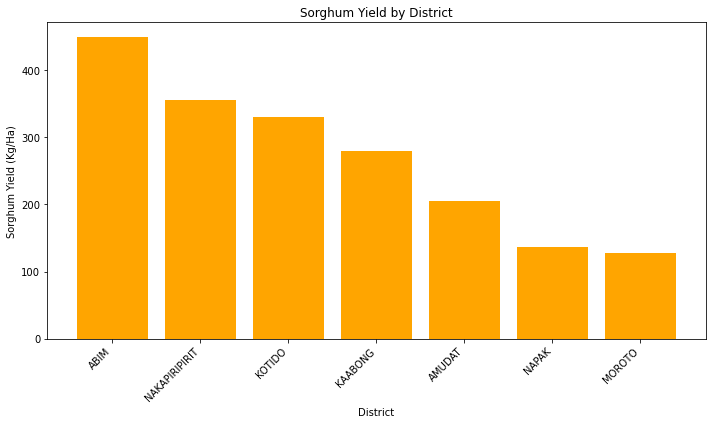

In [145]:
sorghum_sorted = district_df.sort_values(by='Sorghum_Yield_KgHa', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(sorghum_sorted['NAME'], sorghum_sorted['Sorghum_Yield_KgHa'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("District")
plt.ylabel("Sorghum Yield (Kg/Ha)")
plt.title("Sorghum Yield by District")
plt.tight_layout()
plt.show()

In [146]:
Sorghum Yield by District: Abim leads in productivity, while Moroto and Napak show the lowest yields per hectare.


SyntaxError: invalid syntax (<ipython-input-146-105030b6376d>, line 1)

#### Bar ChartMaize Yield by District

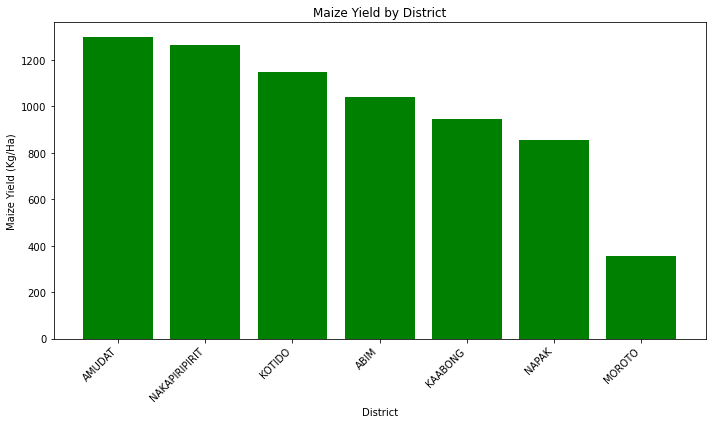

In [147]:
maize_sorted = district_df.sort_values(by='Maize_Yield_KgHa', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(maize_sorted['NAME'], maize_sorted['Maize_Yield_KgHa'], color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("District")
plt.ylabel("Maize Yield (Kg/Ha)")
plt.title("Maize Yield by District")
plt.tight_layout()
plt.show()

#### Comparison Bar Chart Sorghum vs Maize Yield 

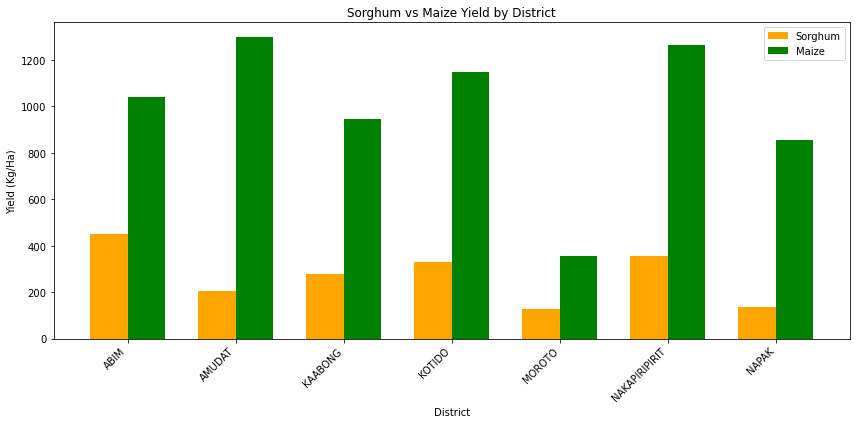

In [148]:
x = np.arange(len(district_df['NAME']))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, district_df['Sorghum_Yield_KgHa'], width, label='Sorghum', color='orange')
plt.bar(x + width/2, district_df['Maize_Yield_KgHa'], width, label='Maize', color='green')
plt.xticks(x, district_df['NAME'], rotation=45, ha='right')
plt.xlabel("District")
plt.ylabel("Yield (Kg/Ha)")
plt.title("Sorghum vs Maize Yield by District")
plt.legend()
plt.tight_layout()
plt.show()

#### Box Plot (Sub-county Distribution)
This is the best way to see the variance within a district. If a box is very long, it means some sub-counties are doing great while others are failing.

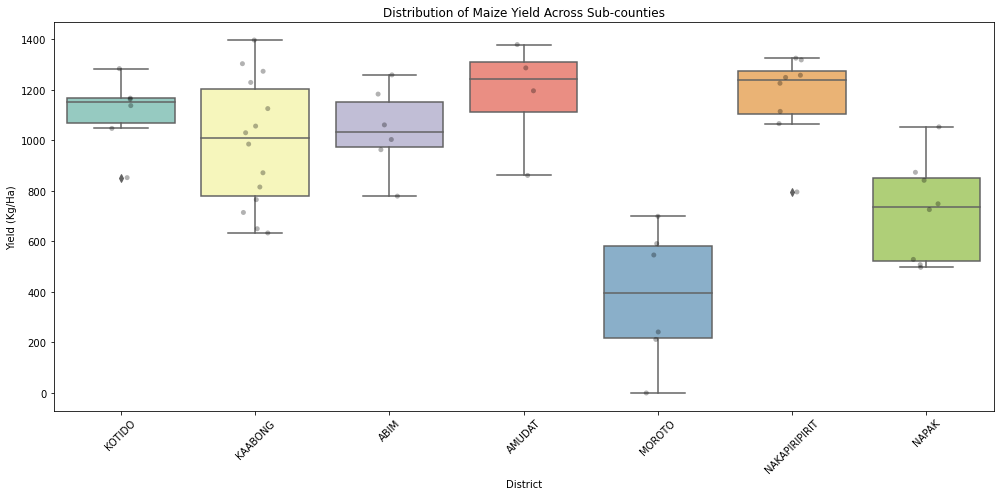

In [149]:
# Maize yield distributions across sub-counties
plt.figure(figsize=(14, 7))

# Boxplot + stripplot for Maize Yield
sns.boxplot(data=subcounty_df, x='DISTRICT_NAME', y='Maize_Yield_KgHa', palette='Set3')
sns.stripplot(data=subcounty_df, x='DISTRICT_NAME', y='Maize_Yield_KgHa', color='black', alpha=0.3)

plt.title('Distribution of Maize Yield Across Sub-counties')
plt.xlabel('District')
plt.ylabel('Yield (Kg/Ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

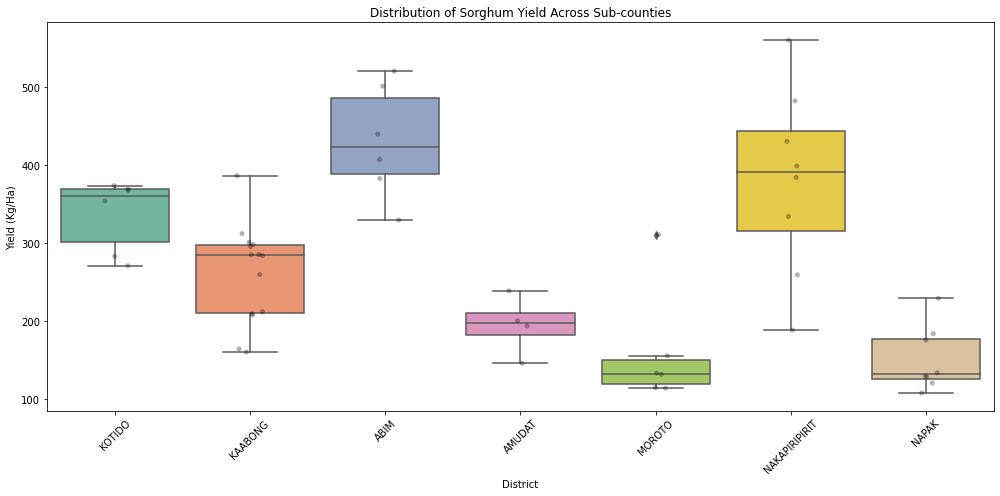

In [150]:
#Sorghum yield Distribution across sub counties
plt.figure(figsize=(14, 7))

# Boxplot + stripplot
sns.boxplot(data=subcounty_df, x='DISTRICT_NAME', y='Sorghum_Yield_KgHa', palette='Set2')
sns.stripplot(data=subcounty_df, x='DISTRICT_NAME', y='Sorghum_Yield_KgHa', color='black', alpha=0.3)

plt.title('Distribution of Sorghum Yield Across Sub-counties')
plt.xlabel('District')
plt.ylabel('Yield (Kg/Ha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Scatter Plot with Outlier Trend Line
This visualizes the relationship between the area planted and the actual production. Points far from the line are your outliers.

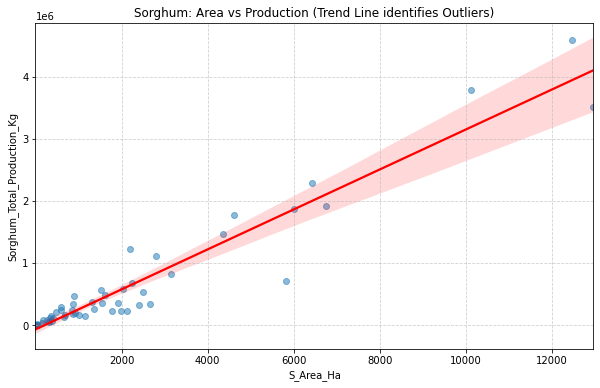

In [151]:
# Sorgum: Area vs Production
plt.figure(figsize=(10, 6))
sns.regplot(data=subcounty_df, x='S_Area_Ha', y='Sorghum_Total_Production_Kg', 
            line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})

plt.title('Sorghum: Area vs Production (Trend Line identifies Outliers)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

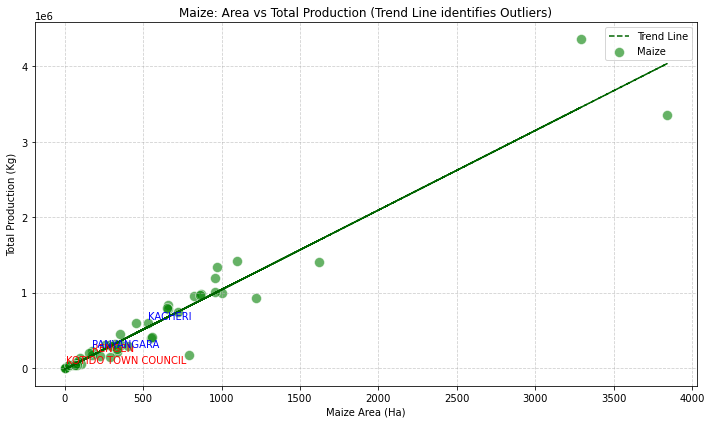

In [152]:
# Maize area vs Total Prodcution
plt.figure(figsize=(10, 6))

# Scatter points
sns.scatterplot(data=subcounty_df, x='M_Area_Ha', y='Maize_Total_Production_Kg', color='green', s=100, alpha=0.6, label='Maize')

# Trend line
slope_m, intercept_m = np.polyfit(subcounty_df['M_Area_Ha'], subcounty_df['Maize_Total_Production_Kg'], 1)
plt.plot(subcounty_df['M_Area_Ha'], slope_m*subcounty_df['M_Area_Ha'] + intercept_m, color='darkgreen', linestyle='--', label='Trend Line')

# Annotate top 3 and bottom 3 producers
for idx in top_maize_prod.index:
    plt.text(subcounty_df.loc[idx,'M_Area_Ha'], subcounty_df.loc[idx,'Maize_Total_Production_Kg'] + 50000,
             subcounty_df.loc[idx,'SUBCOUNTY_NAME'], color='red', fontsize=10)

for idx in bottom_maize_prod.index:
    plt.text(subcounty_df.loc[idx,'M_Area_Ha'], subcounty_df.loc[idx,'Maize_Total_Production_Kg'] + 50000,
             subcounty_df.loc[idx,'SUBCOUNTY_NAME'], color='blue', fontsize=10)

plt.title('Maize: Area vs Total Production (Trend Line identifies Outliers)')
plt.xlabel('Maize Area (Ha)')
plt.ylabel('Total Production (Kg)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Findings: Agricultural Analysis of Karamoja
This analysis investigates the productivity and efficiency of Sorghum and Maize across the Karamoja region using district and sub-county level data.
1. Crop Yield Comparison (Kg/Ha)
The data reveals a significant difference in productivity between the two primary crops:
* Maize Dominance: Maize yields are consistently higher than Sorghum across almost all districts. In areas like Amudat and Nakapiripirit, Maize productivity significantly outpaces Sorghum.
* Top Districts: Abim leads in Sorghum yield, while Amudat and Nakapiripirit are the top performers for Maize.
* Low Performance Areas: Moroto and Napak show the lowest yields for both crops, with Moroto exhibiting a drastic drop in Maize productivity compared to the regional average.
2. Yield Variance and Stability
Using box plots to view sub-county distributions reveals how "stable" production is within a district:
* High Internal Disparity: Districts like Kaabong and Nakapiripirit show a wide spread in yields, meaning some sub-counties are highly successful while others are failing.
* Consistency: Amudat displays a tighter distribution for Maize, indicating more uniform farming conditions or practices across its territory.
3. Efficiency and Production Outliers
The relationship between the area planted and total production helps identify where resources are being used most effectively:
* Strong Correlation: There is a clear linear relationship; generally, the more land planted, the higher the production.
* Efficiency Outliers: Points appearing above the trend line (Positive Outliers) represent high-efficiency sub-counties.
* Underperformers: Annotated sub-counties like Kacheri and Kotido Town Council fall below the expected production for their size, marking them as areas needing potential intervention.


### Conclusion
The analysis of the Karamoja food monitoring data indicates that while the region has strong agricultural potential, it is currently hampered by significant regional and sub-county disparities.
Key Takeaways:
* Maize is the primary volume driver: Because Maize yields are significantly higher (Kg/Ha), it remains the most critical crop for regional food security.
* Targeted Intervention Needed: The "Negative Outliers" identified in the scatter plots should be the focus of agricultural support. Since these sub-counties underperform relative to their land size, they likely face specific issues like poor seed quality, lack of water, or pests.
* Data Readiness: The project concluded by exporting cleaned datasets (cleaned_district_data.csv and cleaned_subcounty_data.csv), which are now ready for use in policy-making or dashboard visualizations.

In [154]:
# Export cleaned data
district_df.to_csv(r'C:\Users\ABC\desktop\Karamoja_Food_Security_Monitoring\cleaned_district_data.csv', index=False)
subcounty_df.to_csv(r'C:\Users\ABC\desktop\Karamoja_Food_Security_Monitoring\cleaned_subcounty_data.csv', index=False)


print("Cleaned data exported successfully!")

Cleaned data exported successfully!
